# Huffpost news analyze

### Group O COMP7630 Project

1. Dataset

    This dataset contains around 240k news headlines from 2012 to 2025 from HuffPost. Based on kaggle dataset (2012-2022) and new post scrapped directly from Huffpost.com (2022 - 2025). It's one of the biggest news datasets and can serve as a benchmark for a variety of tasks.

    Each record in the dataset consists of the following attributes:

    * category: category in which the article was published.
    * headline: the headline of the news article.
    * authors: list of authors who contributed to the article.
    * link: link to the original news article.
    * short_description: Abstract of the news article.
    * date: publication date of the article.
    
    example:
    ```json
    {
        "link": "https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9",
        "headline": "Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters",
        "category": "U.S. NEWS",
        "short_description": "Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.",
        "authors": "Carla K. Johnson, AP",
        "date": "2022-09-23"
    }
    ```




#加载数据集


In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')
json_path = '/content/drive/MyDrive/data/News_Category_Dataset_v3.json'
df = pd.read_json(json_path, lines=True)

In [129]:
import pandas as pd

json_path = './merged_news_dataset.csv'
df = pd.read_csv(json_path)

### Environment Setup local

In [ ]:
# Verify the data
df

In [130]:
%pip install --upgrade nltk

import nltk
nltk.download('punkt', download_dir='./nltk_data/')
nltk.download('punkt_tab', download_dir='./nltk_data/')
nltk.download('stopwords', download_dir='./nltk_data/')
nltk.download('averaged_perceptron_tagger', download_dir='./nltk_data/')
nltk.download('wordnet', download_dir='./nltk_data/')
nltk.download('omw-1.4', download_dir='./nltk_data/')

nltk.data.path.append('./nltk_data/')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to ./nltk_data/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./nltk_data/...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ./nltk_data/...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to ./nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ./nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 数据处理和数据分析


2. Dataset Analysis and Data Preprocessing.

    1. Data Preprocessing
        * Sentence segmentation and tokenization
        * Remove URLs and email addresses
        * Stop word removal
        * Filter out short sentences

    2. Data Analysis (Analyze before and after preprocessing)
        * Analyze text length distribution
        * Analyze class distribution
        * Calculate keywords for each category
        * Generate word clouds for visualization
    

In [131]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk

# Init
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

extra_stopwords = ['said', 'say', 'would', 'could', 'also', 'one', 'two', 'make', 'may',
                   'u', 'time', 'new', 'best', 'dont', 'word', 'week']
stop_words.update(extra_stopwords)


print(stop_words)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

{'do', 'from', 'so', 'where', 'ain', "she's", 'while', "aren't", 'don', 'a', 'same', "we've", 'of', 'than', 'very', 'under', "wasn't", 'shouldn', 'them', 'also', "we're", "don't", 'out', 'can', 'again', 'll', 'needn', 'to', 't', "should've", 'down', 'we', 'i', 'which', 'and', 'themselves', "we'd", 'it', 'is', 'our', 'having', 'into', 'no', 'aren', 'hadn', 'above', 'him', 'but', 'ours', 'the', 'all', 'could', 'were', 'yourselves', 'some', 'by', 'now', 'during', 'didn', 'not', 'does', 'below', "you'd", 'their', 'new', 'then', 'any', "she'd", "hasn't", 's', 'dont', 'doing', 'they', 'will', 'myself', 'd', 'u', 'before', 'own', 'further', 'for', "shouldn't", 'been', 'couldn', 'other', "they're", "it'll", 've', 'one', 'doesn', 'at', "haven't", 'has', 'm', "it's", 'my', 'once', "they'll", 'each', 'few', 'two', 'week', "i've", 'are', 'whom', "he'd", 'am', 'against', 're', 'isn', "they've", 'or', 'did', 'you', 'wouldn', 'had', 'word', 'just', "he'll", 'most', "we'll", 'wasn', 'should', "doesn't

In [132]:
# 1. Sentence segmentation and tokenization

df.dropna(subset=['headline', 'short_description'], inplace=True)

df['text'] = df['headline'] + ' ' + df['short_description'].fillna('')

df['cleaned_text'] = df['text'].apply(preprocess_text)

df

,link,headline,category,short_description,authors,date,cleaned_text,text
0,https://www.huffpost.com/entry/medicaid-elizab...,Elizabeth Warren Is The Latest High-Profile De...,POLITICS,The Massachusetts senator is hitting the road ...,By Igor Bobic,2025-04-01,elizabeth warren latest highprofile democrat r...,Elizabeth Warren Is The Latest High-Profile De...
1,https://www.huffpost.com/entry/amazon-anti-uni...,Amazon Spent Nearly $13 Million On Anti-Union ...,BUSINESS,The online retailer increased its anti-union s...,By Dave Jamieson,2025-04-01,amazon spent nearly million antiunion consulta...,Amazon Spent Nearly $13 Million On Anti-Union ...
2,https://www.huffpost.com/entry/jake-tapper-ass...,Jake Tapper’s Bleak Verdict Amid Signal Scanda...,POLITICS,Six words from the CNN anchor drew a knowing s...,By Lee Moran,2025-04-01,jake tapper bleak verdict amid signal scandal ...,Jake Tapper’s Bleak Verdict Amid Signal Scanda...
3,https://www.huffpost.com/entry/donald-trump-ba...,Donald Trump Reacts To Hypothetical Matchup Ag...,POLITICS,A Fox News reporter asked the president about ...,By Ron Dicker,2025-04-01,donald trump reacts hypothetical matchup barac...,Donald Trump Reacts To Hypothetical Matchup Ag...
4,https://www.huffpost.com/entry/iceland-volcano...,Iceland's Blue Lagoon Spa And Nearby Town Evac...,POLITICS,Magma began flowing at a volcano near the town...,AP,2025-04-01,iceland blue lagoon spa nearby town evacuated ...,Iceland's Blue Lagoon Spa And Nearby Town Evac...
...,...,...,...,...,...,...,...,...
219340,https://www.huffingtonpost.com/entry/7-amazing...,7 Amazing Name Generators (PHOTOS),COMEDY,Let's be honest: most of our names are pretty ...,Seena Vali,2012-01-28,amazing name generator photo let honest name p...,7 Amazing Name Generators (PHOTOS) Let's be ho...
219341,https://www.huffingtonpost.com/entry/russian-c...,Russian Cargo Ship Docks At International Spac...,SCIENCE,Gallery: Space Station's Expedition 30 Mission...,NaN,2012-01-28,russian cargo ship dock international space st...,Russian Cargo Ship Docks At International Spac...
219342,https://www.huffingtonpost.com/entry/robots-pl...,"Robots Play Catch, Starring Agile Justin And R...",SCIENCE,"image 1: throw As Hizook reports, DLR started ...",Travis Korte,2012-01-28,robot play catch starring agile justin rollin ...,"Robots Play Catch, Starring Agile Justin And R..."
219343,https://www.huffingtonpost.com/entry/thomas-ed...,Thomas Edison Voted Most Iconic Inventor In U....,SCIENCE,That doesn't mean Jobs lacks for fans in the w...,NaN,2012-01-28,thomas edison voted iconic inventor u history ...,Thomas Edison Voted Most Iconic Inventor In U....


In [ ]:
# 2. display the distribution of text length and category

import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['text'].str.len()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 24))

# Plot 1: Distribution of text length
sns.histplot(data=df, x='text_length', bins=30, ax=ax1)
ax1.set_title('Distribution of Text Length')
ax1.set_xlabel('Text Length (characters)')
ax1.set_ylabel('Count')

# Plot 2: Box plot of text length by category
sns.boxplot(data=df, x='category', y='text_length', ax=ax2)
ax2.set_title('Text Length Distribution by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Text Length (characters)')
plt.xticks(rotation=45, ha='right')  # Fixed: using plt.xticks instead of ax2.xticks


# Plot 3:
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax3)
ax3.set_title('Distribution of News Categories')
ax3.set_xlabel('Category')
ax3.set_ylabel('Count')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: word cloud
from wordcloud import WordCloud
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
ax4.imshow(wordcloud)
ax4.set_title('Word Cloud of News Content')
ax4.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# filter out low frequency words and short words

all_words = ' '.join(df['cleaned_text']).split()
word_counts = Counter(all_words)
min_freq = 5
min_length = 3
df['filtered_text'] = df['cleaned_text'].apply(
    lambda x: ' '.join([word for word in x.split()
    if word_counts[word] >= min_freq and len(word) >= min_length])
)

top_categories = df['category'].value_counts().head(15).index
df = df[df['category'].isin(top_categories)]


from imblearn.over_sampling import RandomOverSampler
X = df['filtered_text']
y = df['category']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.to_frame(), y)
df_balanced = pd.DataFrame({'text': X_resampled['filtered_text'], 'category': y_resampled})

df_balanced.to_csv('preprocessed_news.csv', index=False)

In [ ]:
# display distribution after preprocessing

df_balanced['text_length'] = df_balanced['text'].str.len()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Distribution of category
sns.histplot(data=df_balanced, x='category', bins=30, ax=ax1)
ax1.set_title('Distribution of Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 2: Top 20 words bar chart
all_words = ' '.join(df_balanced['text']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=ax2)
ax2.set_title('Top 20 Most Frequent Words')
ax2.set_xlabel('Count')
ax2.set_ylabel('Words')


# Plot 3: Overall word cloud visualization
text = ' '.join(df_balanced['text'])
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     max_words=100,
                     colormap='viridis').generate(text)

ax3.imshow(wordcloud)
ax3.set_title('Overall Word Cloud')
ax3.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Add dropdown to show top 15 frequent words by category
from ipywidgets import interact, Dropdown

def show_category_top_words(category):
    plt.figure(figsize=(10, 6))

    # Get text for selected category
    category_text = ' '.join(df_balanced[df_balanced['category'] == category]['text'])

    # Count word frequencies
    words = category_text.split()
    word_counts = Counter(words)

    # Get top 15 words
    top_words = word_counts.most_common(15)
    words, counts = zip(*top_words)

    # Create bar chart
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top 15 Most Frequent Words in Category: {category}')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

# This will create an interactive dropdown in the notebook
interact(show_category_top_words,
         category=Dropdown(options=sorted(df_balanced['category'].unique()),
                          description='Category:'))

3. Topic Modeling

* LDA

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install numpy bertopic scikit-learn pyLDAvis

In [ ]:
# init

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from bertopic import BERTopic
import pyLDAvis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Topic number
n_topics = 10

In [ ]:
from tqdm import tqdm
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 2. LDA (Latent Dirichlet Allocation)

n_topics = 15

print("Training LDA model...")

# 创建词频矩阵（简化批处理过程）
def process_texts_in_batches(texts, batch_size=1000):
    with tqdm(total=len(texts), desc="Processing texts") as pbar:
        processed_texts = []
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            processed_texts.extend(batch)
            pbar.update(len(batch))
    return processed_texts

# 优化的CountVectorizer设置
count_vectorizer = CountVectorizer(
    max_features=2000,    
    min_df=10,           # 增加最小文档频率阈值
    max_df=0.8,          # 降低最大文档频率阈值
    stop_words='english',
    token_pattern=r'(?u)\b\w{3,}\b'  # 只保留长度≥3的词
)

# 处理文本
print("Vectorizing documents...")
processed_texts = process_texts_in_batches(df['cleaned_text'])
with tqdm(desc="Creating document-term matrix") as pbar:
    count_matrix = count_vectorizer.fit_transform(processed_texts)
    pbar.update(1)

# 优化的LDA模型
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=20,
    learning_method='online',
    batch_size=128,
    evaluate_every=2,
    verbose=1
)

# 训练LDA模型
print("Training LDA model...")
lda_output = lda_model.fit_transform(count_matrix)

# 获取主题词（避免使用并行处理）
print("Extracting topics...")
feature_names = count_vectorizer.get_feature_names_out()
lda_topics = {}

# 使用普通循环替代并行处理
for topic_idx, topic in enumerate(tqdm(lda_model.components_, desc="Processing topics")):
    top_words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    lda_topics[f"Topic {topic_idx+1}"] = top_words
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

# 保存结果
lda_results = {
    'model': lda_model,
    'vectorizer': count_vectorizer,
    'output': lda_output,
    'topics': lda_topics
}

In [ ]:
def visualize_lda_results(lda_model, count_vectorizer, lda_output, n_words=10):
    # 1. 主题-词语分布可视化
    feature_names = count_vectorizer.get_feature_names_out()

    # 创建一个大图，包含所有主题
    n_topics = len(lda_model.components_)
    n_rows = (n_topics + 4) // 5  # 每行5个主题
    fig = plt.figure(figsize=(20, 4*n_rows))

    for i, topic in enumerate(lda_model.components_):
        plt.subplot(n_rows, 5, i + 1)
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        top_weights = topic[top_words_idx]

        plt.barh(top_words, top_weights)
        plt.title(f'Topic {i+1}')
        plt.xlabel('Weight')

    plt.tight_layout()
    plt.show()

    # 2. 主题分布热力图
    plt.figure(figsize=(12, 8))
    topic_term_matrix = pd.DataFrame(
        lda_model.components_,
        columns=feature_names,
        index=[f'Topic {i+1}' for i in range(n_topics)]
    )
    sns.heatmap(topic_term_matrix.iloc[:, :30], cmap='YlOrRd')
    plt.title('Topic-Term Heatmap')
    plt.xlabel('Terms')
    plt.ylabel('Topics')
    plt.show()

    # 3. 文档-主题分布
    doc_topics = pd.DataFrame(
        lda_output,
        columns=[f'Topic {i+1}' for i in range(n_topics)]
    )

    plt.figure(figsize=(10, 6))
    doc_topics.mean().plot(kind='bar')
    plt.title('Average Topic Distribution Across Documents')
    plt.xlabel('Topics')
    plt.ylabel('Average Weight')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 4. 主题相关性
    plt.figure(figsize=(10, 8))
    topic_corr = np.corrcoef(lda_output.T)
    sns.heatmap(
        topic_corr,
        annot=True,
        cmap='coolwarm',
        xticklabels=[f'T{i+1}' for i in range(n_topics)],
        yticklabels=[f'T{i+1}' for i in range(n_topics)]
    )
    plt.title('Topic Correlations')
    plt.show()

    # 5. 打印每个主题的关键词
    print("\nTop words in each topic:")
    for i, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        print(f"\nTopic {i+1}:")
        print(", ".join(top_words))

# 使用这个函数来可视化LDA结果
visualize_lda_results(lda_model, count_vectorizer, lda_output)

In [ ]:
!pip uninstall numpy
!pip install numpy

#  implementation of sentiment analysis

In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
import numpy as np
import re
import spacy
from spacy import displacy
from tqdm import tqdm
tqdm.pandas()

# 加载数据和模型
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
df = pd.read_csv("preprocessed_news.csv")

# 增强的情感分析预处理
def enhanced_sentiment_preprocess(text):
    """保留情感相关词汇和上下文"""
    # 清理文本
    text = re.sub(r"http\S+|www\S+|https\S+", "", str(text).lower())
    text = re.sub(r"[^a-zA-Z\s'’]", "", text)

    # 处理否定和强调
    text = re.sub(r"\b(not|never|no)\b", " not_", text)
    text = re.sub(r"\b(very|really|extremely)\b", " very_", text)

    # 提取情感相关词汇
    doc = nlp(text)
    tokens = []
    for token in doc:
        # 保留形容词、副词、动词、否定词、情感名词
        if (token.pos_ in {"ADJ", "ADV", "VERB", "NOUN"}) or \
           (token.dep_ == "neg") or \
           (token.text.startswith(("not_", "very_"))):
            tokens.append(token.lemma_)

    return " ".join(tokens)

# 应用预处理
df["sentiment_text"] = df["text"].progress_apply(enhanced_sentiment_preprocess)

In [ ]:
df

In [ ]:
# 确保使用兼容的 NumPy 版本
try:
    import numpy as np
    assert np.__version__.startswith('1.')
except:
    !pip install numpy==1.24.0 --force-reinstall
    print("请重启运行时以使 NumPy 降级生效")
    raise

### Sentiment Analysis

In [ ]:
# 安装和更新必要库
!pip install --upgrade scikit-surprise
!pip install --upgrade numpy
!pip install --upgrade transformers
!python -m spacy download en_core_web_sm

In [ ]:
!pip install numpy --upgrade --force-reinstall


In [ ]:
!pip install numpy==2.0.2 --upgrade

In [ ]:
import numpy as np
print(f"使用的NumPy版本: {np.__version__}")  # 确认是2.0.2


!pip install pandas vaderSentiment textblob transformers tqdm

In [ ]:
# 首先确保安装正确版本的库


# 然后导入库
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline
from tqdm import tqdm
import numpy as np  # 确保这是1.24.0版本

print(f"使用的NumPy版本: {np.__version__}")  # 应该显示1.24.x

tqdm.pandas()

# 初始化各分析模型
vader = SentimentIntensityAnalyzer()

# 安全地初始化transformer模型
try:
    sentiment_pipeline = pipeline("sentiment-analysis",
                                model="distilbert-base-uncased-finetuned-sst-2-english")
except Exception as e:
    print(f"无法加载transformer模型: {e}")
    sentiment_pipeline = None

def ensemble_sentiment_analysis(text):
    """集成多种情感分析方法"""
    # 处理缺失值
    if pd.isna(text):
        text = ""

    # VADER分析
    vader_scores = vader.polarity_scores(text)

    # TextBlob分析
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Transformer模型分析
    transformer_score = 0
    if sentiment_pipeline is not None:
        try:
            transformer_result = sentiment_pipeline(text[:512])[0]  # 限制长度
            transformer_score = (1 if transformer_result["label"] == "POSITIVE" else -1) * transformer_result["score"]
        except Exception as e:
            print(f"Transformer分析出错: {e}")

    # 加权综合得分
    combined_score = (vader_scores["compound"] * 0.4 +
                     polarity * 0.3 +
                     transformer_score * 0.3)

    # 生成详细报告
    return {
        "vader_compound": vader_scores["compound"],
        "textblob_polarity": polarity,
        "transformer_score": transformer_score,
        "combined_score": combined_score,
        "sentiment_label": "positive" if combined_score > 0.1 else
                          "negative" if combined_score < -0.1 else
                          "neutral"
    }

# 应用情感分析
print("analyzing sentiment...")
sentiment_results = df["text"].progress_apply(ensemble_sentiment_analysis)
sentiment_df = pd.DataFrame(list(sentiment_results))
df = pd.concat([df, sentiment_df], axis=1)

df.to_csv("sentiment.csv", index=False)
print(df)

### 3. Entity level sentiment analysis

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm --user
!python -m spacy info en_core_web_sm

In [75]:
import spacy
from tqdm import tqdm, trange
import pandas as pd
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


df = pd.read_csv("sentiment.csv")

df = df.dropna()

# 加载英文模型（仅启用NER需要的组件）
nlp_ner = spacy.load("en_core_web_sm", disable=["parser", "tagger", "lemmatizer"])

def extract_entities_with_sentiment(row):
    """
    优化版的实体情感关联提取
    输入: DataFrame的一行(包含text和情感分数)
    输出: 实体及其情感信息的字典
    """
    text = row["text"]
    doc = nlp_ner(text)
    entities = {}

    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG", "GPE", "PRODUCT"]:
            # 获取实体上下文窗口
            window_size = 10  # 前后各取10个词作为上下文
            start = max(0, ent.start - window_size)
            end = min(len(doc), ent.end + window_size)
            context = doc[start:end].text

            # 使用已有情感分数(优化性能)
            entities[ent.text] = {
                "type": ent.label_,
                "sentiment": row["combined_score"],  # 使用整句情感分数
                "label": row["sentiment_label"],
                "context": context,
                "entity_text": ent.text
            }
    return entities
# 测试示例
sample_row = df.iloc[6]  # 取第5条数据
print("Example text:", sample_row)
print("Example result:")
print(extract_entities_with_sentiment(sample_row))

Example text: text                 yale professor leaving spot exact reason trump...
category                                                      POLITICS
sentiment_text       professor leave spot exact reason trump brutal...
vader_compound                                                 -0.6808
textblob_polarity                                             -0.15625
transformer_score                                             -0.92486
combined_score                                               -0.596653
sentiment_label                                               negative
Name: 6, dtype: object
Example result:
{'yale': {'type': 'ORG', 'sentiment': np.float64(-0.5966531253528595), 'label': 'negative', 'context': 'yale professor leaving spot exact reason trump brutal attack university jason', 'entity_text': 'yale'}, 'jason stanley': {'type': 'PERSON', 'sentiment': np.float64(-0.5966531253528595), 'label': 'negative', 'context': 'yale professor leaving spot exact reason trump brutal at

In [76]:
# 批量处理函数（优化内存使用）
def batch_extract_entities(df, batch_size=1000):
    """
    分批处理DataFrame，避免内存不足
    """
    results = []
    length = len(df)
    for i in trange(0, length, batch_size):
        batch = df.iloc[i:i+batch_size]
        batch_results = batch.apply(extract_entities_with_sentiment, axis=1)
        results.append(batch_results)
    return pd.concat(results)

# 应用到整个数据集
print("NER running...")
df["entity_sentiments"] = batch_extract_entities(df)


NER running...


100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [24:56<00:00,  3.02s/it]


In [77]:
df

,text,category,sentiment_text,vader_compound,textblob_polarity,transformer_score,combined_score,sentiment_label,entity_sentiments
0,elizabeth warren latest highprofile democrat r...,POLITICS,late rally territory hit road town focus fight...,-0.2500,0.500000,-0.904183,-0.221255,negative,"{'elizabeth warren': {'type': 'PERSON', 'senti..."
1,amazon spent nearly million antiunion consulta...,BUSINESS,spend nearly antiunion consultant last year on...,0.4215,0.093750,-0.984259,-0.098553,neutral,{}
2,jake tapper bleak verdict amid signal scandal ...,POLITICS,bleak verdict signal scandal draw smile word draw,0.0516,-0.350000,-0.961101,-0.372690,negative,"{'jeffrey goldberg': {'type': 'PERSON', 'senti..."
3,donald trump reacts hypothetical matchup barac...,POLITICS,trump react hypothetical matchup news reporter...,-0.4215,0.000000,-0.985167,-0.464150,negative,"{'donald trump': {'type': 'PERSON', 'sentiment..."
4,iceland blue lagoon spa nearby town evacuated ...,POLITICS,spa nearby town evacuate volcanic eruption fea...,-0.4939,0.050000,-0.946614,-0.466544,negative,{}
...,...,...,...,...,...,...,...,...,...
494755,noninvasive test syndrome science dramatic tel...,WELLNESS,noninvasive test syndrome science dramatic tel...,0.0000,-0.091667,-0.993083,-0.325425,negative,{}
494756,every nurse appreciation throughout history cu...,WELLNESS,nurse appreciation history culture medicine re...,0.9355,0.050000,0.995473,0.687842,positive,{}
494757,veteran day health benefit service want thank ...,WELLNESS,day health benefit service want thank military...,0.8316,-0.050000,0.992162,0.615289,positive,{}
494758,scrappy people find meaning work research unco...,WELLNESS,scrappy people find mean work research uncover...,0.5994,0.133333,0.967787,0.570096,positive,{}


### 4. Sentiment Analysis Visualization

In [ ]:
!pip install seaborn

In [ ]:
!pip install --upgrade matplotlib

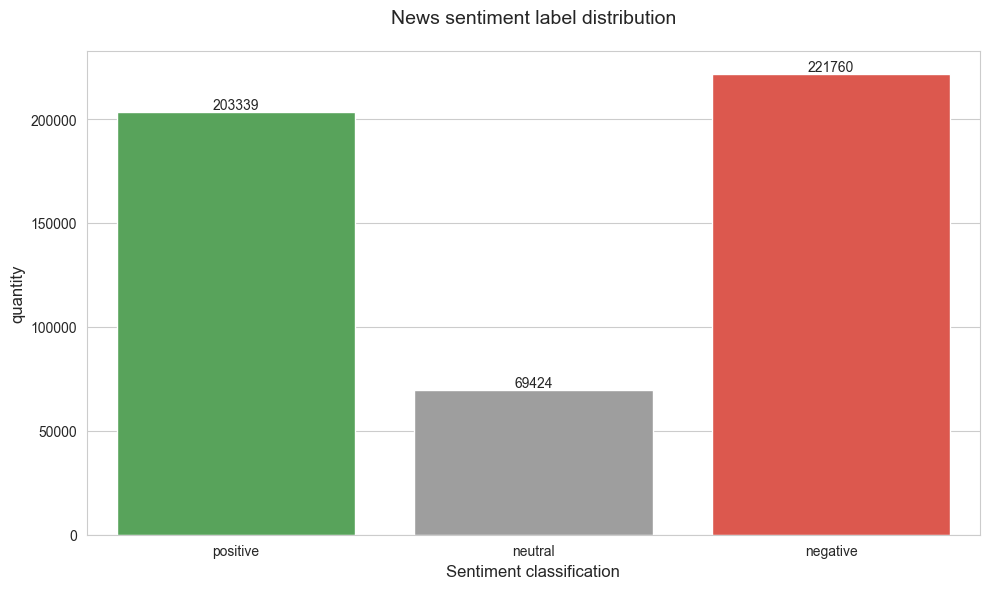

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

# 设置 seaborn 绘图风格
sns.set_style("whitegrid")  # 设置 seaborn 的风格，这里使用 whitegrid 风格，你也可以根据需要选择其他风格
sns.set_palette("husl")



# 1. 整体情感分布
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='sentiment_label',
                 order=['positive', 'neutral', 'negative'],
                 palette={'positive': '#4caf50', 'neutral': '#9e9e9e', 'negative': '#f44336'})
plt.title('News sentiment label distribution', fontsize=14, pad=20)
plt.xlabel('Sentiment classification', fontsize=12)
plt.ylabel('quantity', fontsize=12)

# 添加数值标签
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

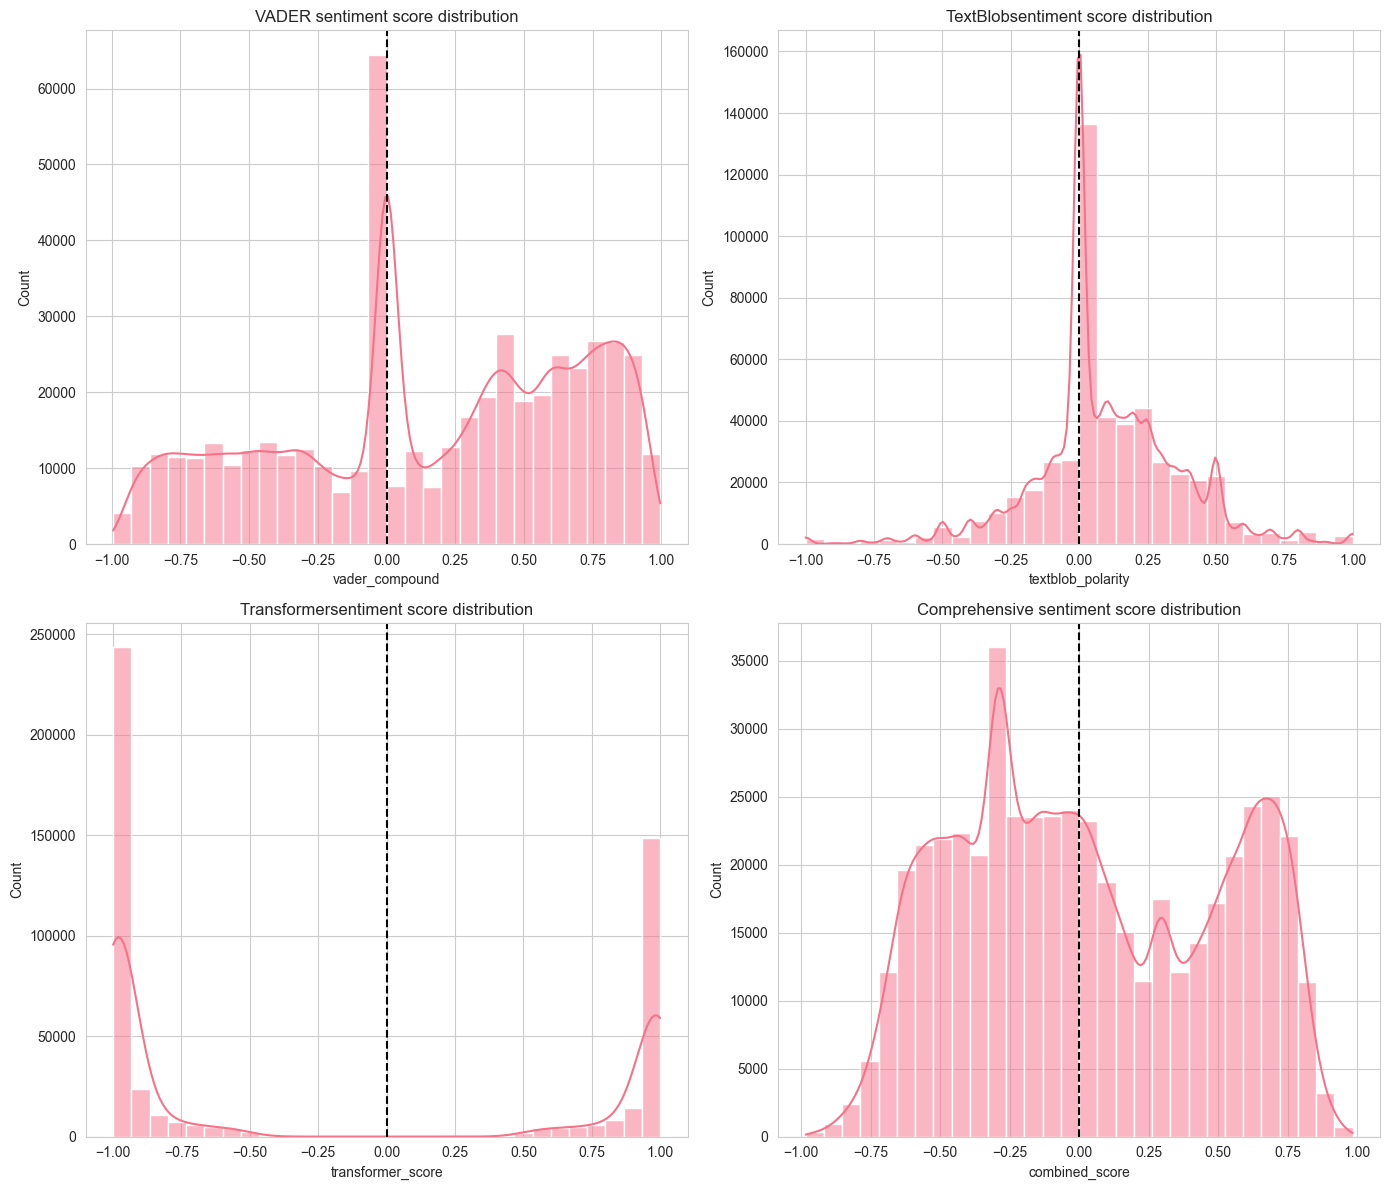

In [79]:
# 2. 多模型情感分数分布对比
plt.figure(figsize=(14, 8))

# 创建子图网格
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# VADER分数分布
sns.histplot(data=df, x='vader_compound', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('VADER sentiment score distribution')
axes[0, 0].axvline(0, color='k', linestyle='--')

# TextBlob分数分布
sns.histplot(data=df, x='textblob_polarity', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('TextBlobsentiment score distribution')
axes[0, 1].axvline(0, color='k', linestyle='--')

# Transformer分数分布
sns.histplot(data=df, x='transformer_score', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Transformersentiment score distribution')
axes[1, 0].axvline(0, color='k', linestyle='--')

# 综合分数分布
sns.histplot(data=df, x='combined_score', bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Comprehensive sentiment score distribution')
axes[1, 1].axvline(0, color='k', linestyle='--')

plt.tight_layout()
plt.show()

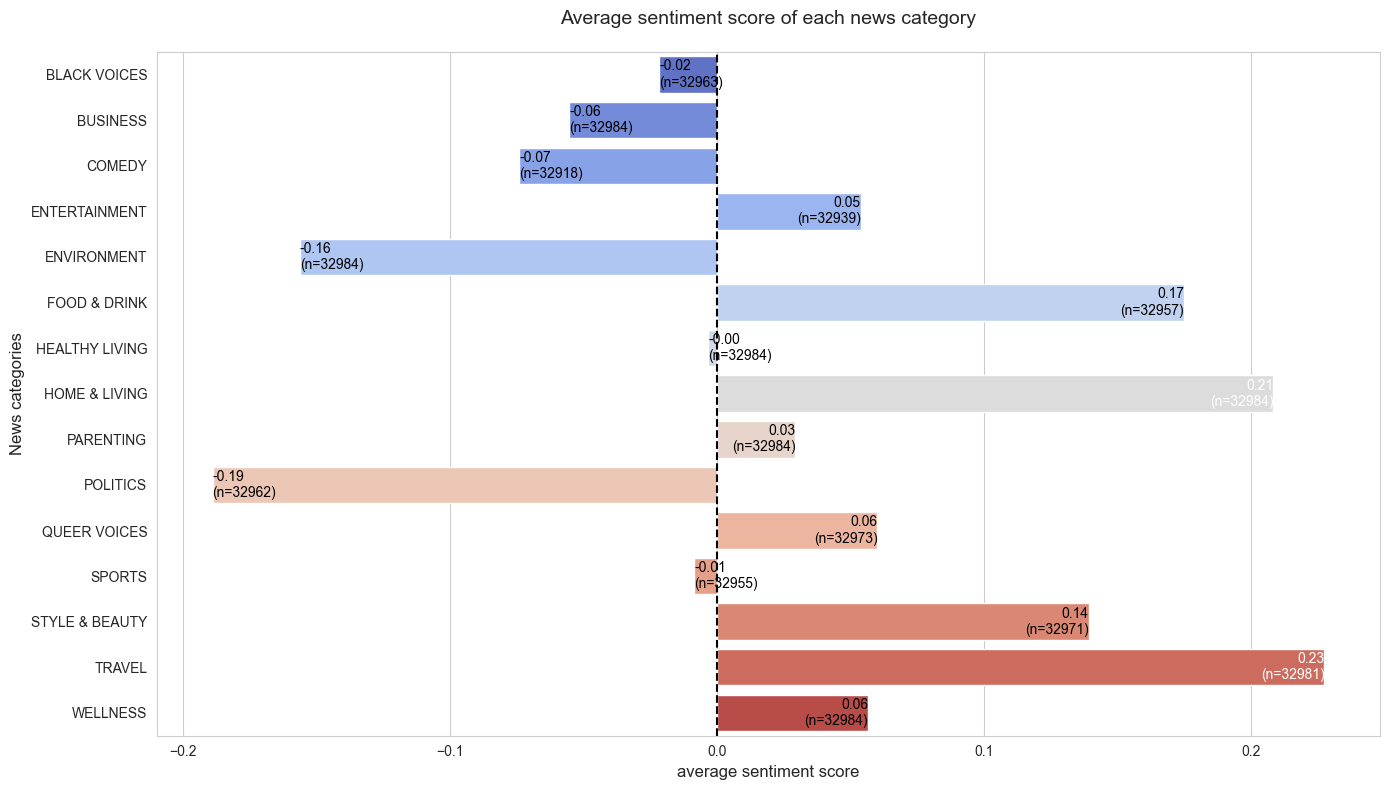

In [80]:
# 3. 各类别情感分布
plt.figure(figsize=(14, 8))

# 按类别分组计算平均情感分数
category_sentiment = df.groupby('category')['combined_score'].agg(['mean', 'count'])
category_sentiment = category_sentiment[category_sentiment['count'] > 50]  # 过滤样本量少的类别

# 绘制条形图
ax = sns.barplot(data=category_sentiment.reset_index(),
                x='mean', y='category',
                palette='coolwarm')
plt.axvline(0, color='k', linestyle='--')
plt.title('Average sentiment score of each news category', fontsize=14, pad=20)
plt.xlabel('average sentiment score', fontsize=12)
plt.ylabel('News categories', fontsize=12)

# 添加数值标签
for i, (mean, count) in enumerate(zip(category_sentiment['mean'], category_sentiment['count'])):
    ax.text(mean, i, f'{mean:.2f}\n(n={count})',
            va='center', ha='left' if mean < 0 else 'right',
            color='white' if abs(mean) > 0.2 else 'black')

plt.tight_layout()
plt.show()

c:\Users\fhq\anaconda3\envs\torch12\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword



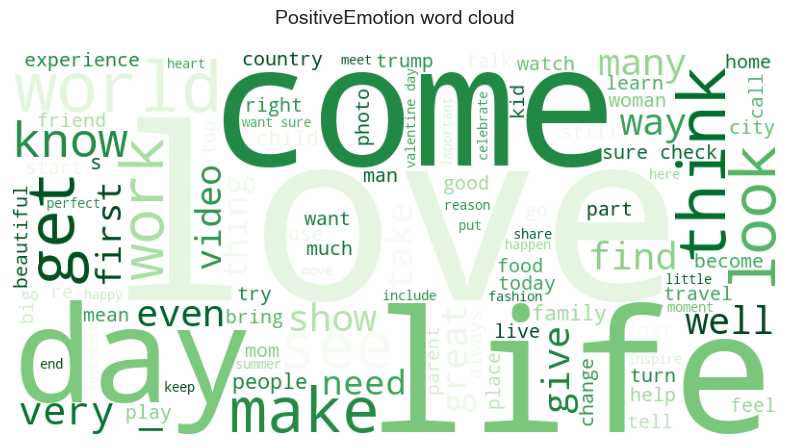

c:\Users\fhq\anaconda3\envs\torch12\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword



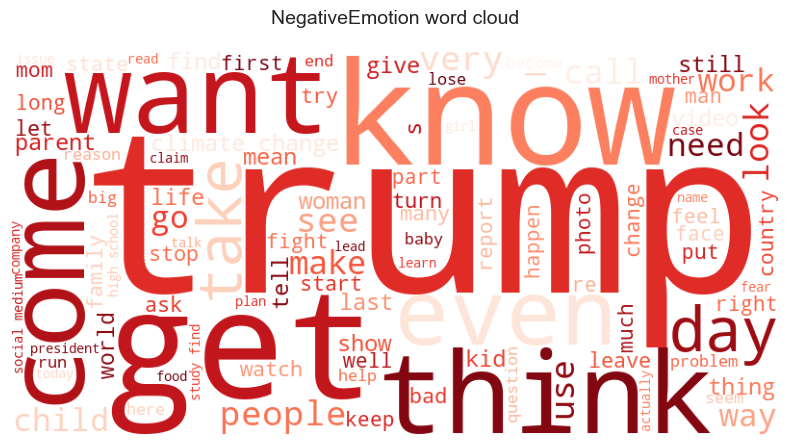

In [81]:
# 4. 情感词云对比
def generate_sentiment_wordcloud(sentiment_type='positive', colormap='Greens'):
    """生成情感词云"""
    subset = df[df['sentiment_label'] == sentiment_type]
    text = ' '.join(subset['sentiment_text'])

    # 过滤停用词
    stopwords = set(['say', 'said', 'will', 'one', 'year', 'new'])

    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        colormap=colormap,
        max_words=100,
        stopwords=stopwords,
        contour_width=3,
        contour_color='steelblue'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(f'{sentiment_type.capitalize()}Emotion word cloud', fontsize=14, pad=20)
    plt.axis("off")
    plt.show()

# 生成正面和负面词云
generate_sentiment_wordcloud('positive', 'Greens')
generate_sentiment_wordcloud('negative', 'Reds')

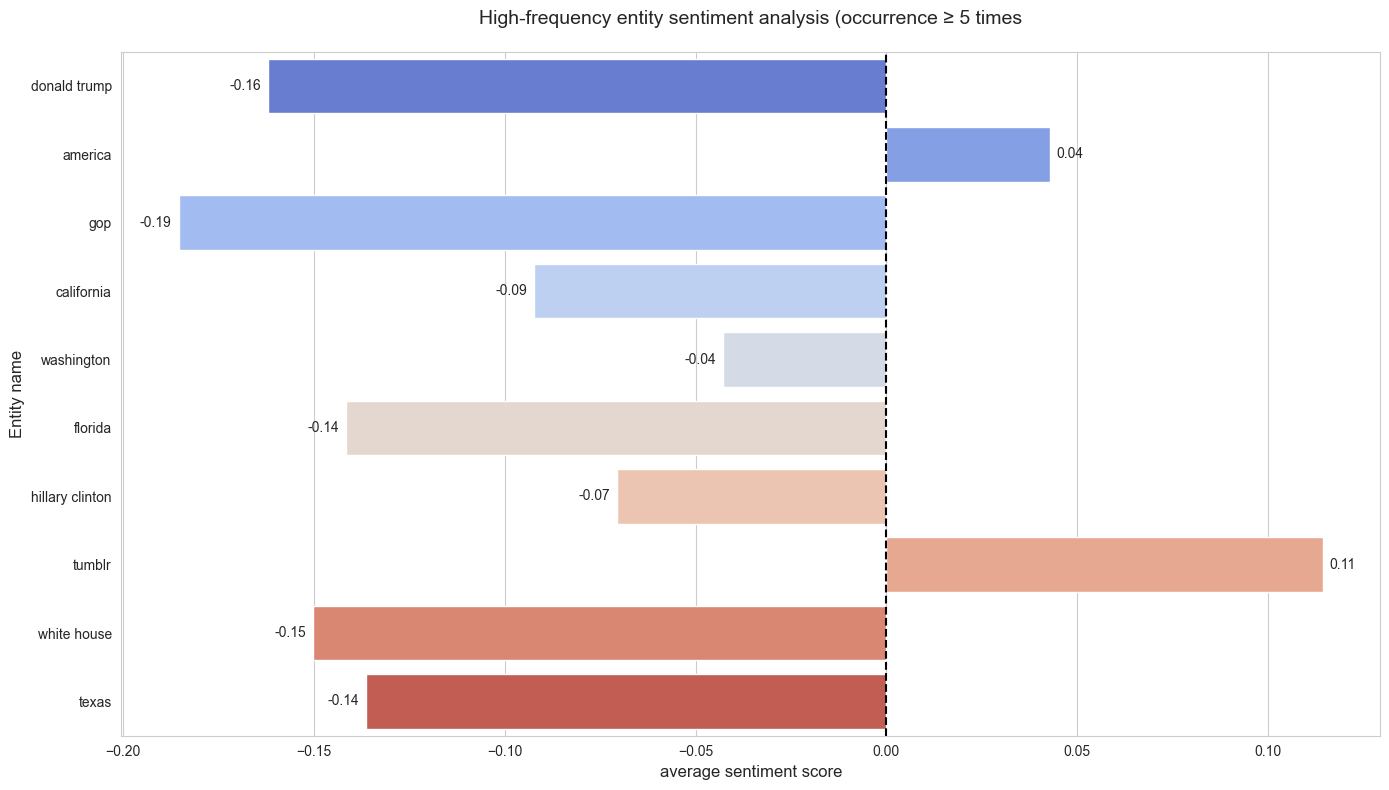

In [82]:
# 5. 实体情感分析
from collections import defaultdict

# 提取所有实体及其情感分数
entity_sentiments = defaultdict(list)
for entities in df['entity_sentiments']:
    for ent, data in entities.items():
        entity_sentiments[ent].append(data['sentiment'])

# 计算每个实体的平均情感
entity_avg_sentiment = {
    ent: np.mean(scores)
    for ent, scores in entity_sentiments.items()
    if len(scores) >= 5  # 只考虑出现5次以上的实体
}

# 转换为DataFrame
entity_df = pd.DataFrame({
    'entity': list(entity_avg_sentiment.keys()),
    'avg_sentiment': list(entity_avg_sentiment.values()),
    'count': [len(entity_sentiments[ent]) for ent in entity_avg_sentiment.keys()]
})

# 筛选最具代表性的实体
top_entities = entity_df.nlargest(10, 'count')

# 可视化
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_entities, x='avg_sentiment', y='entity',
                palette='coolwarm')
plt.axvline(0, color='k', linestyle='--')
plt.title('High-frequency entity sentiment analysis (occurrence ≥ 5 times', fontsize=14, pad=20)
plt.xlabel('average sentiment score', fontsize=12)
plt.ylabel('Entity name', fontsize=12)

# 添加数值标签
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left' if width > 0 else 'right',
                va='center',
                xytext=(5 if width > 0 else -5, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
!pip install ipywidgets plotly

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [83]:
from ipywidgets import interact, widgets
import plotly.express as px

# 6.1 交互式情感探索
@interact
def explore_sentiment(category=widgets.Dropdown(
    options=sorted(df['category'].unique())),
    score_type=widgets.Dropdown(
    options=['combined_score', 'vader_compound', 'textblob_polarity'])):
    """交互式探索不同类别的情感分布"""
    subset = df[df['category'] == category]

    fig = px.histogram(subset, x=score_type,
                      nbins=30,
                      title=f'{category} category {score_type} score_type',
                      color_discrete_sequence=['#636EFA'])

    fig.update_layout(
        xaxis_title='sentiment score',
        yaxis_title='quantity',
        bargap=0.1
    )
    fig.add_vline(x=0, line_dash="dash", line_color="black")
    fig.show()

# 6.2 交互式实体探索
if len(entity_df) > 0:
    @interact
    def explore_entity(min_count=widgets.IntSlider(
        min=1, max=entity_df['count'].max(), value=5)):
        """交互式探索实体情感"""
        filtered = entity_df[entity_df['count'] >= min_count]

        fig = px.scatter(filtered, x='avg_sentiment', y='entity',
                        size='count', color='avg_sentiment',
                        color_continuous_scale='RdYlGn',
                        title=f'Entity sentiment analysis (occurrence ≥{min_count} Second - rate)')

        fig.update_layout(
            xaxis_title='average sentiment score',
            yaxis_title='Entity name',
            coloraxis_colorbar=dict(title="sentiment score")
        )
        fig.add_vline(x=0, line_dash="dash", line_color="black")
        fig.show()

interactive(children=(Dropdown(description='category', options=('BLACK VOICES', 'BUSINESS', 'COMEDY', 'ENTERTA…

interactive(children=(IntSlider(value=5, description='min_count', max=7368, min=1), Output()), _dom_classes=('…

In [84]:
# 7. 生成高级分析报告
def generate_sentiment_report():
    """生成综合情感分析报告"""
    report = {
        'overall_sentiment': {
            'positive': len(df[df['sentiment_label'] == 'positive']),
            'neutral': len(df[df['sentiment_label'] == 'neutral']),
            'negative': len(df[df['sentiment_label'] == 'negative'])
        },
        'top_positive_category': df.groupby('category')['combined_score'].mean().idxmax(),
        'top_negative_category': df.groupby('category')['combined_score'].mean().idxmin(),
        'most_positive_entity': max(entity_avg_sentiment.items(), key=lambda x: x[1])[0] if entity_avg_sentiment else "N/A",
        'most_negative_entity': min(entity_avg_sentiment.items(), key=lambda x: x[1])[0] if entity_avg_sentiment else "N/A"
    }

    # 打印报告
    print("="*50)
    print("Sentiment Analysis Report".center(40))
    print("="*50)
    print(f"\nOverall Distribution:")
    print(f"- Positive: {report['overall_sentiment']['positive']}")
    print(f"- Neutral: {report['overall_sentiment']['neutral']}")
    print(f"- Negative: {report['overall_sentiment']['negative']}")

    print(f"\nThe most positive category: {report['top_positive_category']}")
    print(f"The most negative category: {report['top_negative_category']}")

    if entity_avg_sentiment:
        print(f"\nThe most positive entity: {report['most_positive_entity']}")
        print(f"The most negative entity: {report['most_negative_entity']}")

    print("\n" + "="*50)

# 生成报告
generate_sentiment_report()

       Sentiment Analysis Report        

Overall Distribution:
- Positive: 203339
- Neutral: 69424
- Negative: 221760

The most positive category: TRAVEL
The most negative category: POLITICS

The most positive entity: lewis lee rachel roy nicole
The most negative entity: geek worst decor



### 5.1 Entity Sentiment Comparision

Entity Auto Selected: donald trump vs america


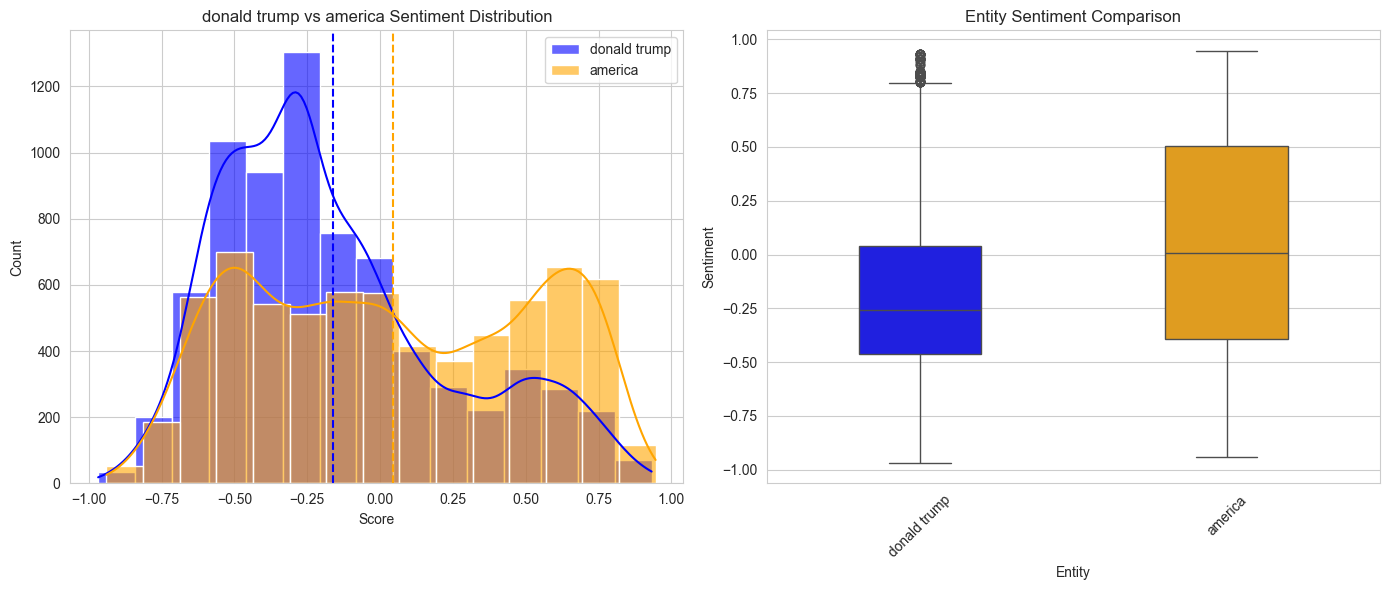


donald trump Sentiment Analysis Result:
- AVG: -0.16
- STD: 0.40
- Len: 7368

america Sentiment Analysis Result:
- AVG: 0.04
- STD: 0.48
- Len: 6888

T-test result:
- T: -27.85
- p: 0.0000
-> significant difference(p < 0.05)


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

def compare_entities(df, entity1=None, entity2=None):
    """
    比较两个实体的情感表现
    参数:
        df: 包含实体情感数据的DataFrame
        entity1: 第一个实体名称 (可选)
        entity2: 第二个实体名称 (可选)
    """
    # 检查entity_sentiments列是否存在
    if "entity_sentiments" not in df.columns:
        print("LACK 'entity_sentiments' COL")
        return

    # 如果没有指定实体，自动选择数据中最常见的两个实体
    if entity1 is None or entity2 is None:
        entity_counts = defaultdict(int)
        for entities in df["entity_sentiments"]:
            if isinstance(entities, dict):
                for ent in entities.keys():
                    entity_counts[ent] += 1

        if len(entity_counts) < 2:
            print("NO ENOUGH DATA")
            return

        # 选择出现频率最高的两个不同实体
        top_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:2]
        entity1, entity2 = top_entities[0][0], top_entities[1][0]
        print(f"Entity Auto Selected: {entity1} vs {entity2}")

    # 收集实体情感数据
    entity1_data = []
    entity2_data = []

    for _, row in df.iterrows():
        entities = row["entity_sentiments"]
        if isinstance(entities, dict):
            if entity1 in entities:
                entity1_data.append(entities[entity1].get("sentiment", 0))
            if entity2 in entities:
                entity2_data.append(entities[entity2].get("sentiment", 0))

    # 检查是否有足够数据
    if not entity1_data or not entity2_data:
        print(f"NO ENOUGH DATA (E1: {len(entity1_data)}, E2: {len(entity2_data)})")
        return

    # 可视化比较
    plt.figure(figsize=(14, 6))

    # 子图1: 情感分布直方图
    plt.subplot(1, 2, 1)
    sns.histplot(entity1_data, bins=15, color="blue", kde=True, alpha=0.6, label=entity1)
    sns.histplot(entity2_data, bins=15, color="orange", kde=True, alpha=0.6, label=entity2)
    plt.axvline(np.mean(entity1_data), color="blue", linestyle="--")
    plt.axvline(np.mean(entity2_data), color="orange", linestyle="--")
    plt.title(f"{entity1} vs {entity2} Sentiment Distribution")
    plt.xlabel("Score")
    plt.legend()

    # 子图2: 箱线图比较
    plt.subplot(1, 2, 2)
    plot_data = pd.DataFrame({
        "Entity": [entity1]*len(entity1_data) + [entity2]*len(entity2_data),
        "Sentiment": entity1_data + entity2_data
    })
    sns.boxplot(data=plot_data, x="Entity", y="Sentiment",
                palette={"blue", "orange"}, width=0.4)
    plt.title("Entity Sentiment Comparison")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # 打印统计信息
    print(f"\n{entity1} Sentiment Analysis Result:")
    print(f"- AVG: {np.mean(entity1_data):.2f}")
    print(f"- STD: {np.std(entity1_data):.2f}")
    print(f"- Len: {len(entity1_data)}")

    print(f"\n{entity2} Sentiment Analysis Result:")
    print(f"- AVG: {np.mean(entity2_data):.2f}")
    print(f"- STD: {np.std(entity2_data):.2f}")
    print(f"- Len: {len(entity2_data)}")

    # 执行t检验 (如果数据足够)
    if len(entity1_data) > 1 and len(entity2_data) > 1:
        from scipy import stats
        t_stat, p_value = stats.ttest_ind(entity1_data, entity2_data)
        print(f"\nT-test result:")
        print(f"- T: {t_stat:.2f}")
        print(f"- p: {p_value:.4f}")
        if p_value < 0.05:
            print("-> significant difference(p < 0.05)")
        else:
            print("-> no significant difference")


compare_entities(df)

### 5.2 sentiment alert system

In [110]:
def sentiment_alert_system(df, threshold=-0.2):
    """
    负面舆情预警系统
    参数:
        df: 包含情感分析结果的DataFrame
        threshold: 负面情感阈值 (默认-0.2)
    """
    # 检查必要的列是否存在
    required_columns = ['entity_sentiments']
    missing_cols = [col for col in required_columns if col not in df.columns]

    if missing_cols:
        print(f"⚠️ LACK COL: {missing_cols}")
        return

    # 尝试不同的情感分数列 (按优先级检查)
    score_columns = ['combined_score', 'vader_compound', 'textblob_polarity']
    score_col = next((col for col in score_columns if col in df.columns), None)

    if score_col is None:
        print("⚠️ NO ENOUGH DATA")
        return

    print(f"Use '{score_col}' to determine")

    # 按类别检测负面情绪
    negative_news = df[df[score_col] < threshold]

    if len(negative_news) > 0:
        print(f"\n⚠️ {len(negative_news)} negative news detected. (score < {threshold})")

        # 统计高频负面实体
        negative_entities = {}
        for entities in negative_news["entity_sentiments"]:
            # 确保entity_sentiments是字典格式
            if isinstance(entities, str):
                try:
                    entities = eval(entities)  # 将字符串转换为字典
                except:
                    continue

            if isinstance(entities, dict):
                for ent, data in entities.items():
                    if isinstance(data, dict) and 'sentiment' in data:
                        if data['sentiment'] < threshold:
                            negative_entities[ent] = negative_entities.get(ent, 0) + 1

        # 展示Top负面实体
        if negative_entities:
            top_negative = sorted(negative_entities.items(),
                                 key=lambda x: x[1], reverse=True)[:5]
            print("\n🔥 Top negative related entity:")
            for ent, count in top_negative:
                print(f"- {ent}: {count}")
        else:
            print("\nNo negative related entity found")

        # 展示代表性负面新闻
        print("\n📌 Representative Negative news:")
        sample_size = min(3, len(negative_news))
        for idx, row in negative_news.nsmallest(sample_size, score_col).iterrows():
            print(f"\n[{idx}] Score: {row[score_col]:.2f}")

            # 尝试获取标题或文本片段
            if 'headline' in df.columns:
                print(f"Title: {row['headline']}")
            elif 'text' in df.columns:
                preview = row['text'][:50] + "..." if len(row['text']) > 50 else row['text']
                print(f"Content: {preview}")

            # 显示关联实体
            entities = row['entity_sentiments']
            if isinstance(entities, str):
                try:
                    entities = eval(entities)
                except:
                    entities = {}

            if isinstance(entities, dict):
                print("Key entity:", ", ".join(entities.keys()))
    else:
        print("\n✅ No negative news detected.")

# 使用示例
print("="*50)
print("Start to find negative news")
print("="*50)
sentiment_alert_system(df)  # 传入您的DataFrame

Start to find negative news
Use 'combined_score' to determine

⚠️ 185876 negative news detected. (score < -0.2)

🔥 Top negative related entity:
- donald trump: 4148
- america: 2498
- gop: 2206
- california: 1814
- florida: 1306

📌 Representative Negative news:

[78460] Score: -0.98
Content: worst product flop wall street worst product flop ...
Key entity: 

[173147] Score: -0.98
Content: worst product flop wall street worst product flop ...
Key entity: 

[173883] Score: -0.98
Content: worst product flop wall street worst product flop ...
Key entity: 


6. 技术挑战解决方案

6.1 高级讽刺检测

In [87]:
from transformers import pipeline

# 加载讽刺检测模型
irony_pipeline = pipeline("text-classification",
                         model="cardiffnlp/twitter-roberta-base-irony")

def detect_irony(text):
    """使用Transformer模型检测讽刺"""
    try:
        result = irony_pipeline(text[:512])[0]  # 限制长度
        return result["label"] == "irony"
    except:
        return False

# 应用到疑似讽刺文本
potential_irony = df[(df["vader_compound"] > 0) & (df["textblob_polarity"] < 0)]
if len(potential_irony) > 0:
    potential_irony["is_ironic"] = potential_irony["text"].progress_apply(detect_irony)
    print(f"Sum: {potential_irony['is_ironic'].sum()} ironic news detected.")

Device set to use cuda:0
100%|███████████████████████████████████████████████████████████████████████████| 39253/39253 [03:58<00:00, 164.24it/s]

Sum: 16900 ironic news detected.



C:\Users\fhq\AppData\Local\Temp\ipykernel_50312\219422700.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 6.2 dynamic domain adaptation

In [ ]:
def dynamic_domain_adaptation(text, category):
    """动态领域适应情感分析"""
    # 领域特定调整规则
    domain_rules = {
        "POLITICS": {
            "boost_words": ["reform", "progress", "bipartisan"],
            "penalty_words": ["scandal", "corruption", "controversy"]
        },
        "TECH": {
            "boost_words": ["innovative", "sleek", "user-friendly"],
            "penalty_words": ["buggy", "outdated", "overpriced"]
        }
    }

    # 获取基础分数
    base_score = ensemble_sentiment_analysis(text)["combined_score"]

    # 应用领域调整
    if category in domain_rules:
        boost = sum(1 for word in domain_rules[category]["boost_words"]
                if word in text.lower()) * 0.05
        penalty = sum(1 for word in domain_rules[category]["penalty_words"]
                     if word in text.lower()) * 0.05
        adjusted_score = base_score + boost - penalty
        return max(-1, min(1, adjusted_score))  # 保持在[-1,1]范围内

    return base_score

# 应用领域自适应
df["domain_adjusted_score"] = df.progress_apply(
    lambda row: dynamic_domain_adaptation(row["text"], row["category"]), axis=1)


In [89]:
df

,text,category,sentiment_text,vader_compound,textblob_polarity,transformer_score,combined_score,sentiment_label,entity_sentiments
0,elizabeth warren latest highprofile democrat r...,POLITICS,late rally territory hit road town focus fight...,-0.2500,0.500000,-0.904183,-0.221255,negative,"{'elizabeth warren': {'type': 'PERSON', 'senti..."
1,amazon spent nearly million antiunion consulta...,BUSINESS,spend nearly antiunion consultant last year on...,0.4215,0.093750,-0.984259,-0.098553,neutral,{}
2,jake tapper bleak verdict amid signal scandal ...,POLITICS,bleak verdict signal scandal draw smile word draw,0.0516,-0.350000,-0.961101,-0.372690,negative,"{'jeffrey goldberg': {'type': 'PERSON', 'senti..."
3,donald trump reacts hypothetical matchup barac...,POLITICS,trump react hypothetical matchup news reporter...,-0.4215,0.000000,-0.985167,-0.464150,negative,"{'donald trump': {'type': 'PERSON', 'sentiment..."
4,iceland blue lagoon spa nearby town evacuated ...,POLITICS,spa nearby town evacuate volcanic eruption fea...,-0.4939,0.050000,-0.946614,-0.466544,negative,{}
...,...,...,...,...,...,...,...,...,...
494755,noninvasive test syndrome science dramatic tel...,WELLNESS,noninvasive test syndrome science dramatic tel...,0.0000,-0.091667,-0.993083,-0.325425,negative,{}
494756,every nurse appreciation throughout history cu...,WELLNESS,nurse appreciation history culture medicine re...,0.9355,0.050000,0.995473,0.687842,positive,{}
494757,veteran day health benefit service want thank ...,WELLNESS,day health benefit service want thank military...,0.8316,-0.050000,0.992162,0.615289,positive,{}
494758,scrappy people find meaning work research unco...,WELLNESS,scrappy people find mean work research uncover...,0.5994,0.133333,0.967787,0.570096,positive,{}


In [106]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

def prepare_transaction_data(df):
    """
    按课程标准准备事务数据
    修改点：
    1. 移除不必要的返回项
    2. 简化特征提取逻辑
    3. 确保输出格式与课程示例完全一致
    """
    transactions = []
    for _, row in df.iterrows():
        itemset = []

        # 必须包含情感标签（课程中的Y变量）
        itemset.append(f"sentiment={row['sentiment_label']}")

        # 仅保留课程要求的特征类型
        if 'category' in df.columns:
            itemset.append(f"category={row['category']}")

        if 'entity_sentiments' in df.columns and isinstance(row['entity_sentiments'], dict):
            itemset.extend([f"entity={ent}" for ent in row['entity_sentiments'].keys()])

        transactions.append(itemset)

    # 严格按课程示例进行one-hot编码
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    return pd.DataFrame(te_ary, columns=te.columns_)


# 生成事务数据
trans_df = prepare_transaction_data(df)
print("Transition Data example:")
print(trans_df.iloc[0, :20])  # 显示第一行的前5个特征

Transition Data example：
category=BLACK VOICES      False
category=BUSINESS          False
category=COMEDY            False
category=ENTERTAINMENT     False
category=ENVIRONMENT       False
category=FOOD & DRINK      False
category=HEALTHY LIVING    False
category=HOME & LIVING     False
category=PARENTING         False
category=POLITICS           True
category=QUEER VOICES      False
category=SPORTS            False
category=STYLE & BEAUTY    False
category=TRAVEL            False
category=WELLNESS          False
entity=aaron               False
entity=aaron austin        False
entity=aaron bennett       False
entity=aaron brian         False
entity=aaron burr          False
Name: 0, dtype: bool


In [95]:
trans_df

,category=BLACK VOICES,category=BUSINESS,category=COMEDY,category=ENTERTAINMENT,category=ENVIRONMENT,category=FOOD & DRINK,category=HEALTHY LIVING,category=HOME & LIVING,category=PARENTING,category=POLITICS,...,entity=zuckerberg trump reality check immigration,entity=zuckerberg york,entity=zuckerbergs medium blitz,entity=zumba meet,entity=zurich,entity=zurich backpacker,entity=zurich zurich,sentiment=negative,sentiment=neutral,sentiment=positive
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
494519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
494520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
494521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [101]:
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(trans_df):
    """
    按课程标准实现关联规则挖掘
    修改点：
    1. 使用课程指定的默认参数
    2. 简化规则筛选逻辑
    3. 输出格式与课程示例一致
    """
    # 使用课程推荐参数（min_support=0.1, min_threshold=0.7）
    frequent_itemsets = apriori(trans_df, min_support=0.001, use_colnames=True)
    
    # 生成规则（按课程要求使用confidence作为度量）
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
    
    # 按课程示例添加length列
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    # 筛选有效规则（lift>1）
    meaningful_rules = rules[rules['lift'] > 1].copy()
    
    meaningful_rules['rule'] = meaningful_rules.apply(
        lambda row: f"{str(row['antecedents'])} → {str(row['consequents'])}",
        axis=1
    )

    return frequent_itemsets, meaningful_rules

# 执行挖掘
frequent_itemsets, rules = mine_association_rules(trans_df)

# 显示结果（按课程表格格式）
print("\nFreq Set Top5:")
print(frequent_itemsets[['itemsets', 'support', 'length']].head())
print("\nRules Top5:")
print(rules[['rule', 'support', 'confidence', 'lift']].head())


Freq Set Top5:
                   itemsets   support  length
0   (category=BLACK VOICES)  0.066656       1
1       (category=BUSINESS)  0.066699       1
2         (category=COMEDY)  0.066565       1
3  (category=ENTERTAINMENT)  0.066608       1
4    (category=ENVIRONMENT)  0.066699       1

Rules Top5:
                                                rule   support  confidence  \
0  frozenset({'entity=bill maher'}) → frozenset({...  0.001840    0.918264   
1  frozenset({'entity=jimmy kimmel'}) → frozenset...  0.002004    0.797907   
2  frozenset({'entity=john oliver'}) → frozenset(...  0.001213    0.877193   
3  frozenset({'entity=seth'}) → frozenset({'categ...  0.001737    0.914803   
4  frozenset({'entity=stephen colbert'}) → frozen...  0.002283    0.901038   

        lift  
0  13.794971  
1  11.986851  
2  13.177961  
3  13.742971  
4  13.536174  


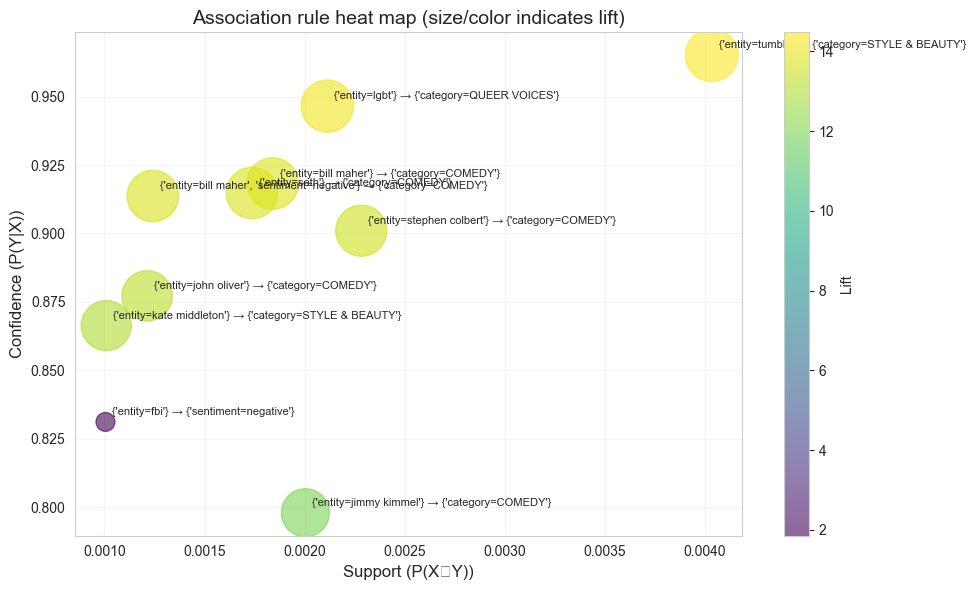

In [104]:
import matplotlib.pyplot as plt

def plot_rules(rules, top_n=10):
    """按课程项目示例绘制规则热力图"""
    if len(rules) == 0:
        print("无有效规则可可视化")
        return

    # 准备数据 (按课程示例格式)
    plot_data = rules.head(top_n).copy()
    plot_data['rule'] = plot_data.apply(
        lambda row: f"{set(row['antecedents'])} → {set(row['consequents'])}",
        axis=1
    )

    # 绘制热力图 (完全按课程风格)
    plt.figure(figsize=(10, 6))
    plt.scatter(
        plot_data['support'],
        plot_data['confidence'],
        s=plot_data['lift'] * 100,  # 点大小表示lift
        c=plot_data['lift'],        # 颜色表示lift
        alpha=0.6,
        cmap='viridis'
    )

    # 添加标签 (按课程示例)
    for i, row in plot_data.iterrows():
        plt.annotate(
            row['rule'],
            (row['support'], row['confidence']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8
        )

    plt.colorbar(label='Lift')
    plt.xlabel('Support (P(X∪Y))', fontsize=12)
    plt.ylabel('Confidence (P(Y|X))', fontsize=12)
    plt.title('Association rule heat map (size/color indicates lift)', fontsize=14)
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

# 可视化
plot_rules(rules)

=== STEP1 ===

=== STEP2 ===

=== STEP3 ===
saved to association_rules.csv

Rules Top5:
                                                 rule   support  confidence  \
8   frozenset({'entity=fbi'}) → frozenset({'sentim...  0.001005    0.831104   
13  frozenset({'category=ENVIRONMENT', 'entity=flo...  0.001052    0.755814   
14  frozenset({'entity=white house', 'category=POL...  0.001187    0.709794   
18  frozenset({'entity=america', 'category=TRAVEL'...  0.001306    0.709890   

        lift  
8   1.853354  
13  1.685459  
14  1.582836  
18  1.726462  

=== STEP4 ===


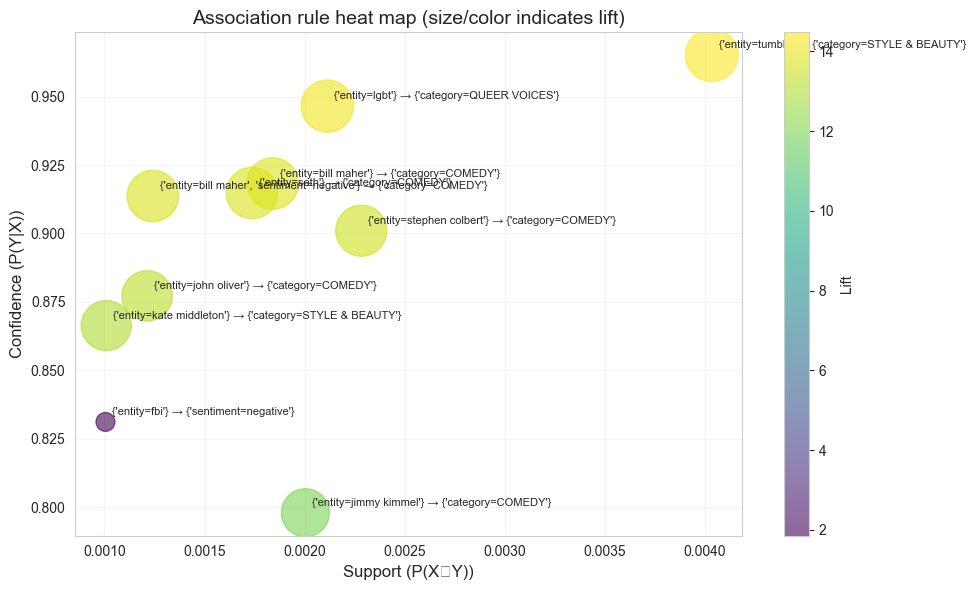

In [105]:
# 1. 数据准备
print("=== STEP1 ===")
trans_df = prepare_transaction_data(df)

# 2. 频繁项集挖掘
print("\n=== STEP2 ===")
frequent_itemsets, rules = mine_association_rules(trans_df)

# 3. 结果分析
print("\n=== STEP3 ===")
if len(rules) > 0:
    # 按课程要求保存结果
    rules.to_csv("association_rules.csv", index=False)
    print("saved to association_rules.csv")

    # 情感相关规则分析（课程项目要求）
    sentiment_rules = rules[rules['consequents'].apply(
        lambda x: any('sentiment=' in item for item in x)
    )]
    print("\nRules Top5:")
    print(sentiment_rules[['rule', 'support', 'confidence', 'lift']].head())
else:
    print("Decrease min_support或min_threshold")

# 4. 可视化
print("\n=== STEP4 ===")
plot_rules(rules)

### Recommand System based on association rules

In [126]:
# -*- coding: utf-8 -*-
"""
基于关联规则的新闻推荐系统
"""

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

class AssociationRuleRecommender:
    def __init__(self, min_support=0.001, min_confidence=0.5):
        """
        初始化推荐器
        :param min_support: 最小支持度
        :param min_confidence: 最小置信度
        """
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.rules = None
        self.frequent_itemsets = None

    def fit(self, trans_df):
        """
        训练关联规则模型
        :param trans_df: one-hot编码的交易数据
        """
        # 挖掘频繁项集
        self.frequent_itemsets = apriori(
            trans_df,
            min_support=self.min_support,
            use_colnames=True
        )

        # 生成关联规则
        self.rules = association_rules(
            self.frequent_itemsets,
            metric="confidence",
            min_threshold=self.min_confidence
        )

        # 过滤有意义的规则(lift>1)
        self.rules = self.rules[self.rules['lift'] > 1]

        print(f"Generate {len(self.rules)} Association Rules")

    def recommend(self, input_items, top_n=5):
        """
        基于输入项生成推荐
        :param input_items: 输入项列表(用户当前浏览/点击的内容)
        :param top_n: 推荐数量
        :return: 推荐结果DataFrame
        """
        if self.rules is None:
            raise ValueError("请先训练模型")

        # 匹配前件包含输入项的规则
        matched_rules = self.rules[
            self.rules['antecedents'].apply(lambda x: x.issubset(set(input_items)))
        ]

        if len(matched_rules) == 0:
            print("没有找到匹配的关联规则")
            return pd.DataFrame()

        # 按提升度和置信度排序
        matched_rules = matched_rules.sort_values(
            ['lift', 'confidence'],
            ascending=False
        )

        # 提取推荐结果
        recommendations = []
        for _, rule in matched_rules.head(top_n).iterrows():
            for item in rule['consequents']:
                recommendations.append({
                    'item': item,
                    'antecedents': ', '.join(rule['antecedents']),
                    'support': rule['support'],
                    'confidence': rule['confidence'],
                    'lift': rule['lift']
                })

        return pd.DataFrame(recommendations).drop_duplicates(subset=['item']).head(top_n)

    def visualize_rules(self, top_n=10):
        """可视化关联规则"""
        if self.rules is None:
            raise ValueError("请先训练模型")
    
        plot_data = self.rules.head(top_n).copy()
        
        # 转换 antecedents 和 consequents 为字符串
        plot_data['rule'] = plot_data.apply(
            lambda row: f"{str(row['antecedents'])} → {str(row['consequents'])}", 
            axis=1)
    
        plt.figure(figsize=(12, 6))
    
        支持度-置信度散点图
        scatter = plt.scatter(
            plot_data['support'],
            plot_data['confidence'],
            s=plot_data['lift'] * 100,  # 确保 lift 值合理，否则可能需要缩放
            c=plot_data['lift'],
            alpha=0.6,
            cmap='viridis'
        )
    
        # 添加标签，使用转换后的规则文本
        for i, row in plot_data.iterrows():
            plt.annotate(
                row['rule'],
                (row['support'], row['confidence']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8
            )
    
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Association Rules (Color and size for Lift)')
        plt.grid(True, alpha=0.2)
        plt.tight_layout()
        plt.show()

# 示例使用
def prepare_news_data(df):
    """
    准备新闻关联规则数据
    :param df: 新闻数据集(需包含category, sentiment_label等列)
    :return: one-hot编码的交易数据
    """
    transactions = []

    # 为每条新闻创建特征集合
    for _, row in df.iterrows():
        features = []

        # 添加类别
        features.append(f"category={row['category']}")

        # 添加情感标签
        features.append(f"sentiment={row['sentiment_label']}")

        # 添加入选实体
        if isinstance(row['entity_sentiments'], dict):
            for entity in row['entity_sentiments'].keys():
                features.append(f"entity={entity[:20]}")  # 限制实体名称长度

        transactions.append(features)

    # 转换为one-hot编码
    from mlxtend.preprocessing import TransactionEncoder
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    return pd.DataFrame(te_ary, columns=te.columns_)


# 准备关联规则数据
trans_df = prepare_news_data(df)

# 初始化并训练推荐器
recommender = AssociationRuleRecommender(min_support=0.001, min_confidence=0.5)
recommender.fit(trans_df)

# 生成推荐
print("\nExample:")
input_items = ['category=ENVIRONMENT']
print(f"\n Input: \n{input_items}")
recommendations = recommender.recommend(input_items)
print(recommendations)


Generate 77 Association Rules

Example:

 Input: 
['category=ENVIRONMENT']
                 item           antecedents   support  confidence      lift
0  sentiment=negative  category=ENVIRONMENT  0.040403    0.605748  1.350814


### News Auto Categorization

In [133]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

print("Training TF-IDF + SVM model...")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], 
    df['category'], 
    test_size=0.2, 
    random_state=42,
    stratify=df['category']
)

# 创建pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LinearSVC(random_state=42))
])

# 训练模型
svm_pipeline.fit(X_train, y_train)

# 预测和评估
y_pred_svm = svm_pipeline.predict(X_test)

# 打印分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# 保存结果用于可视化
svm_results = {
    'y_true': y_test,
    'y_pred': y_pred_svm,
    'model_name': 'SVM'
}

Training TF-IDF + SVM model...

Classification Report:
                precision    recall  f1-score   support

           ART       0.00      0.00      0.00        15
          ARTS       0.26      0.16      0.20       173
ARTS & CULTURE       0.31      0.21      0.25       268
  BLACK VOICES       0.44      0.31      0.37       835
      BUSINESS       0.45      0.42      0.43      1029
     CELEBRITY       0.19      0.05      0.07       111
       COLLEGE       0.34      0.30      0.32       184
        COMEDY       0.53      0.44      0.48       928
         CRIME       0.47      0.51      0.49       566
CULTURE & ARTS       0.42      0.29      0.34       213
       DIVORCE       0.78      0.71      0.74       685
     EDUCATION       0.43      0.34      0.38       180
 ENTERTAINMENT       0.56      0.67      0.61      2952
   ENVIRONMENT       0.49      0.50      0.50       945
     EXTREMISM       0.25      0.04      0.06        28
         FIFTY       0.33      0.15      0.20   

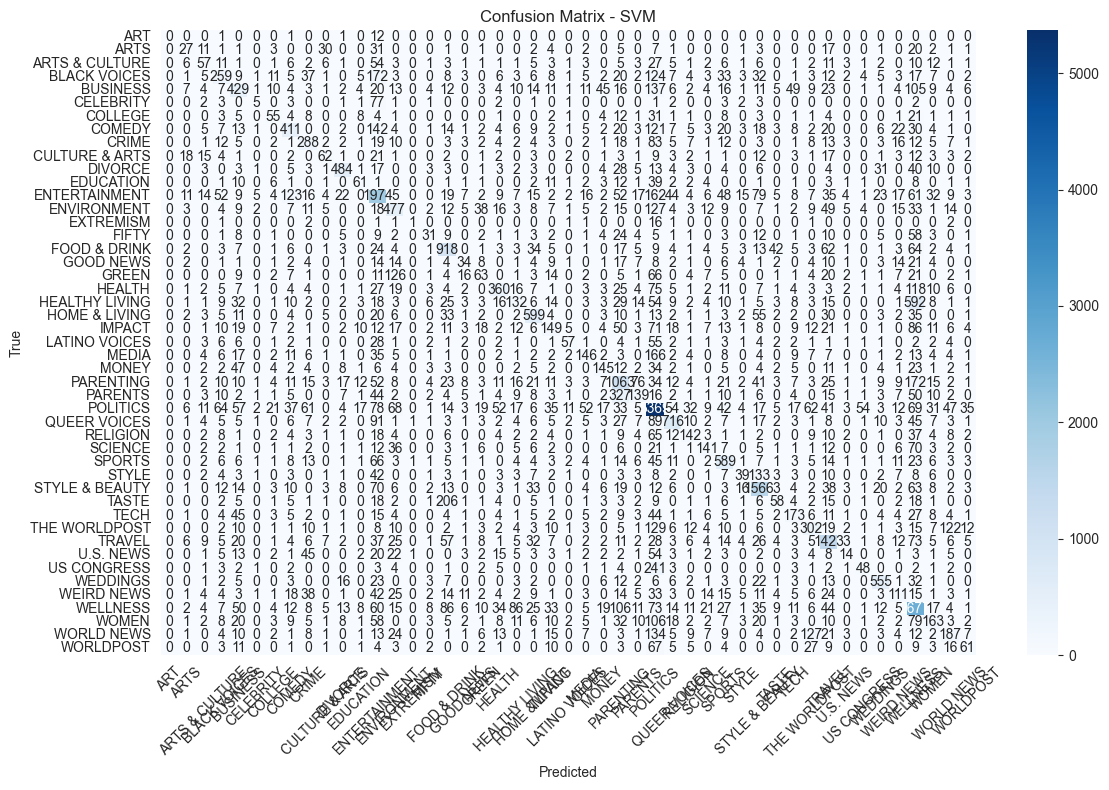

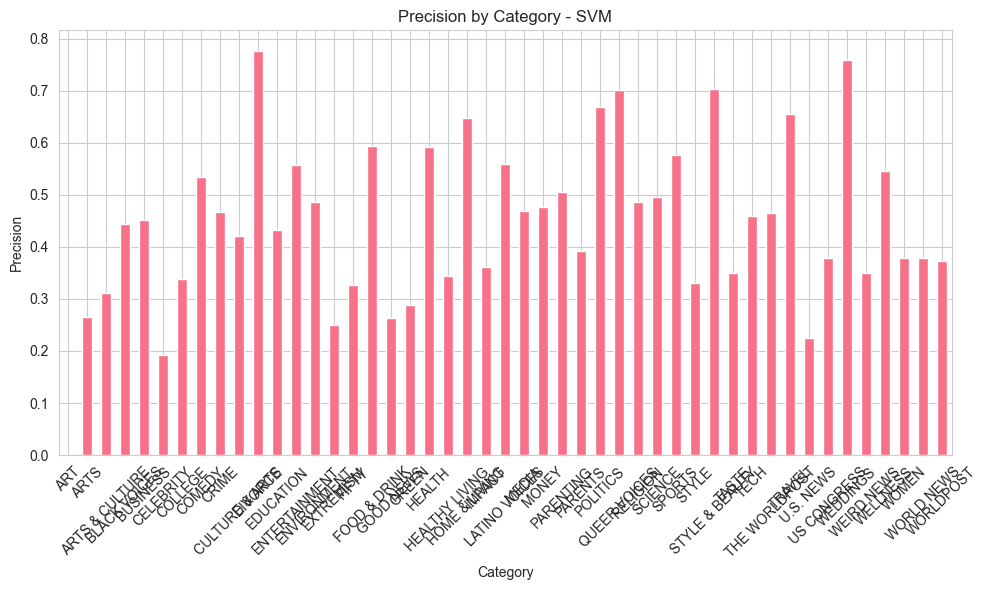

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# 混淆矩阵可视化
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_pipeline.classes_,
            yticklabels=svm_pipeline.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 每个类别的准确率可视化
class_report = classification_report(y_test, y_pred_svm, output_dict=True)
class_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(10, 6))
class_df['precision'].iloc[:-3].plot(kind='bar')
plt.title('Precision by Category - SVM')
plt.xlabel('Category')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
# 测试新闻分类
def classify_news(text, pipeline):
    """
    使用训练好的模型对新闻进行分类
    
    参数:
        text (str): 新闻文本
        pipeline: 训练好的模型pipeline
    
    返回:
        dict: 包含分类结果和预测概率的字典
    """
    # 预测类别
    predicted_category = pipeline.predict([text])[0]
    
    # 获取决策函数值（可以用来表示预测的确信度）
    decision_scores = pipeline.decision_function([text])[0]
    
    # 获取所有类别标签
    categories = pipeline.classes_
    
    # 将决策分数转换为相对确信度（通过softmax）
    confidence_scores = np.exp(decision_scores) / np.sum(np.exp(decision_scores))
    
    # 创建类别-确信度对应关系
    category_confidence = dict(zip(categories, confidence_scores))
    
    # 按确信度排序
    sorted_predictions = sorted(
        category_confidence.items(), 
        key=lambda x: x[1], 
        reverse=True
    )
    
    return {
        'predicted_category': predicted_category,
        'confidence_scores': sorted_predictions
    }

# 测试样例
sample_news = """Trump and his allies say short-term economic pain, through higher prices on consumer goods, 
                is worth the glory that tariffs will bring."""

# 进行预测
result = classify_news(sample_news, svm_pipeline)

# 打印结果
print("Text:")
print("-" * 80)
print(sample_news)
print("-" * 80)

print("-" * 80)
print("\nResult:")
print(f"Predict Label: \n#{result['predicted_category']}\n")
print("-" * 80)
print("\nConfidence Mat:")
for category, confidence in result['confidence_scores']:
    print(f"{category}: {confidence:.4f}")

Text:
--------------------------------------------------------------------------------
Trump and his allies say short-term economic pain, through higher prices on consumer goods, 
                is worth the glory that tariffs will bring.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Result:
Predict Label: 
#POLITICS

--------------------------------------------------------------------------------

Confidence Mat:
POLITICS: 0.0532
STYLE: 0.0358
GREEN: 0.0314
BUSINESS: 0.0305
STYLE & BEAUTY: 0.0305
COLLEGE: 0.0290
BLACK VOICES: 0.0289
MONEY: 0.0278
FOOD & DRINK: 0.0274
PARENTS: 0.0269
U.S. NEWS: 0.0264
ENVIRONMENT: 0.0255
EXTREMISM: 0.0249
COMEDY: 0.0246
ENTERTAINMENT: 0.0240
SCIENCE: 0.0239
WEIRD NEWS: 0.0232
ART: 0.0229
HEALTH: 0.0223
WELLNESS: 0.0223
WOMEN: 0.0220
QUEER VOICES: 0.0215
LATINO VOICES: 0.0210
ARTS & CULTURE: 0.0203
CELEBRITY: 0.0195
HOME & LIVING: 0.0194